### Baseball Case Study

Problem Statement:

* This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

***** Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

***** Output: Number of predicted wins (W)

In [1]:
''' IMPORTING THE NECESSARY LIBRARIRES '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
''' LOADING THE DATASET '''
df = pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# check for the details information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### in this dateset we have
* 1 - float datatype
* 16 - integer datatype

In [4]:
# check for the shape of the dataset
df.shape

(30, 17)

##### we have 30 rows and 17 columns

In [5]:
# summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


<AxesSubplot:>

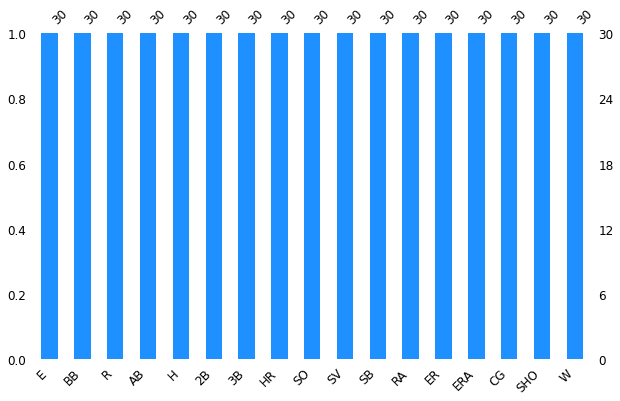

In [6]:
# Check for the missing values
msno.bar(df,color='dodgerblue',figsize=(10,6),fontsize=12,sort='descending')

##### We do not have missing values in this dataset

<Figure size 576x432 with 0 Axes>

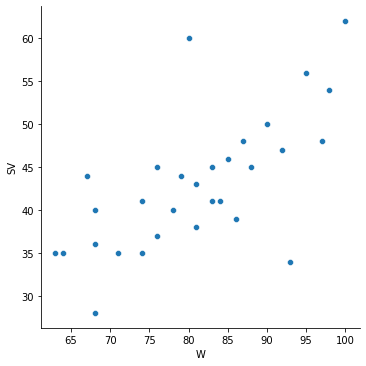

In [7]:
plt.figure(figsize=(8,6))
sns.relplot(x='W',y='SV',data=df,cmap='viridis')
plt.show()

#### in this plot we can see that the more the saves more the wins for the team

In [8]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<Figure size 576x432 with 0 Axes>

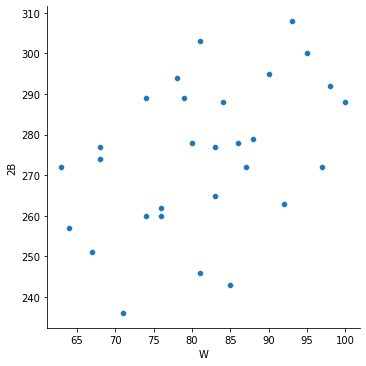

In [9]:
plt.figure(figsize=(8,6))
sns.relplot(x='W',y='2B',data=df,cmap='viridis')
plt.show()

#### Here we can see that the 2Doubles are really helpting the team to have more victories

<Figure size 576x432 with 0 Axes>

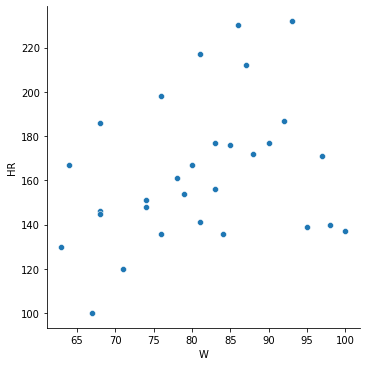

In [10]:
plt.figure(figsize=(8,6))
sns.relplot(x='W',y='HR',data=df,cmap='viridis')
plt.show()

<Figure size 576x432 with 0 Axes>

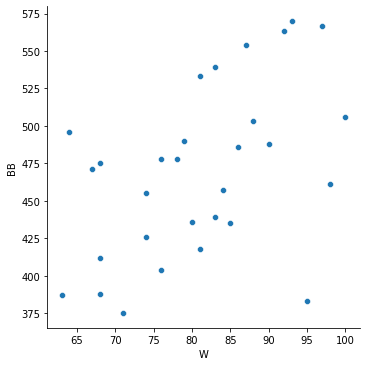

In [11]:
plt.figure(figsize=(8,6))
sns.relplot(x='W',y='BB',data=df,cmap='viridis')
plt.show()

<Figure size 576x432 with 0 Axes>

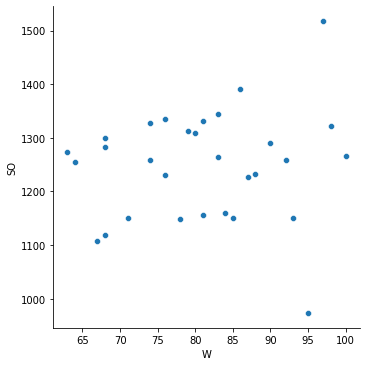

In [12]:
plt.figure(figsize=(8,6))
sns.relplot(x='W',y='SO',data=df,cmap='viridis')
plt.show()

<Figure size 576x432 with 0 Axes>

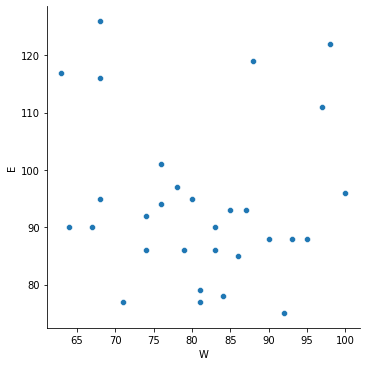

In [13]:
plt.figure(figsize=(8,6))
sns.relplot(x=df['W'],y=df['E'])
plt.show()

### Checking for the Outliers

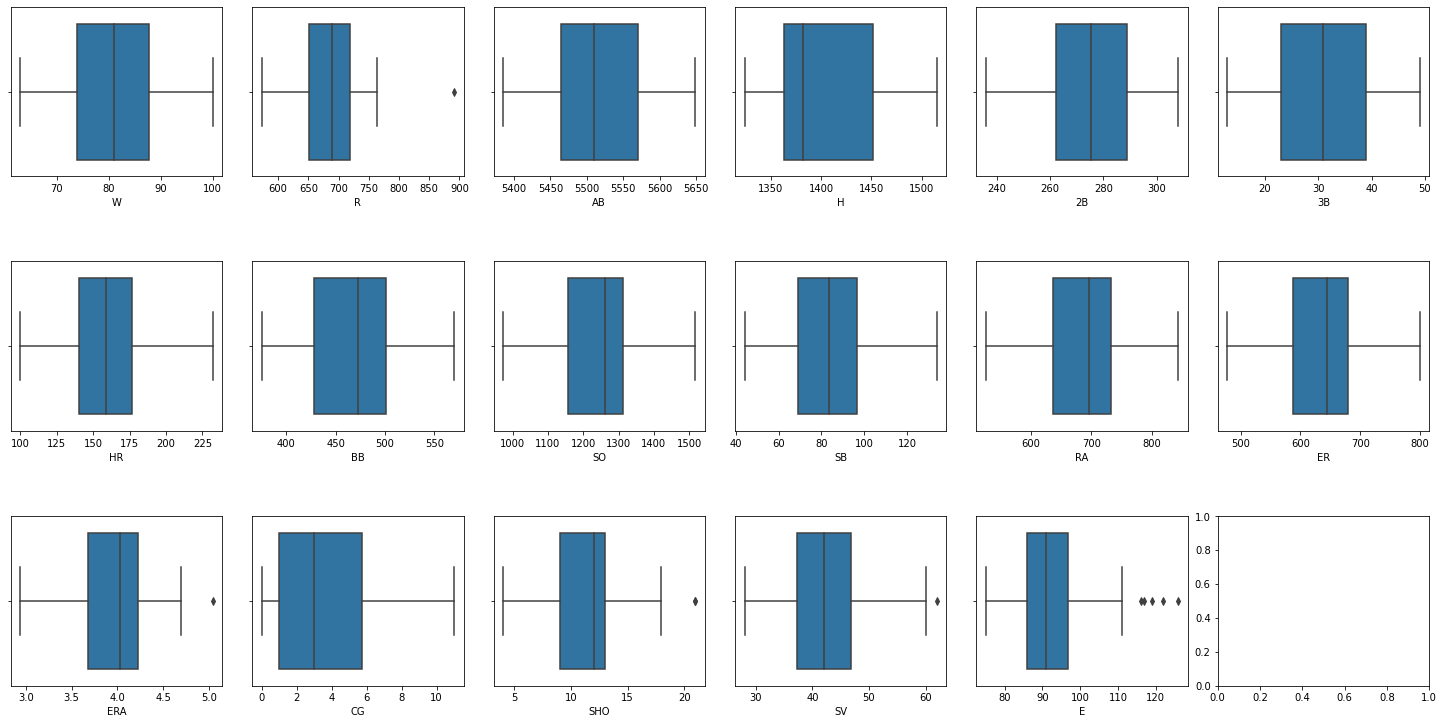

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.boxplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

''' As we can see there are few columns which has outliers which we need to handle first '''

In [15]:
print(df['R'].quantile(0.10))
print(df['R'].quantile(0.90))

625.6
748.3


In [16]:
df['R'] = np.where(df['R'] <625.6,625.6,df['R'])
df['R'] = np.where(df['R'] >748.3,748.3,df['R'])
print(df['R'].skew())

0.09895345325586102


In [17]:
print(df['E'].quantile(0.20))
print(df['E'].quantile(0.80))

85.8
103.00000000000003


In [18]:
df['E'] = np.where(df['E'] <85.8,85.8,df['E'])
df['E'] = np.where(df['E'] >103.00,103.00,df['E'])
print(df['E'].skew())

0.5249732190573341


In [19]:
print(df['ERA'].quantile(0.10))
print(df['ERA'].quantile(0.90))

3.423
4.433000000000001


In [20]:
df['ERA'] = np.where(df['ERA'] <3.42,3.42,df['ERA'])
df['ERA'] = np.where(df['ERA'] >4.43,4.43,df['ERA'])
print(df['ERA'].skew())

-0.19119972580613262


In [21]:
print(df['SHO'].quantile(0.10))
print(df['SHO'].quantile(0.90))

6.9
15.300000000000004


In [22]:
df['SHO'] = np.where(df['SHO'] <6.9,6.9,df['SHO'])
df['SHO'] = np.where(df['SHO'] >15.3,15.3,df['SHO'])
print(df['SHO'].skew())

-0.03643551861255854


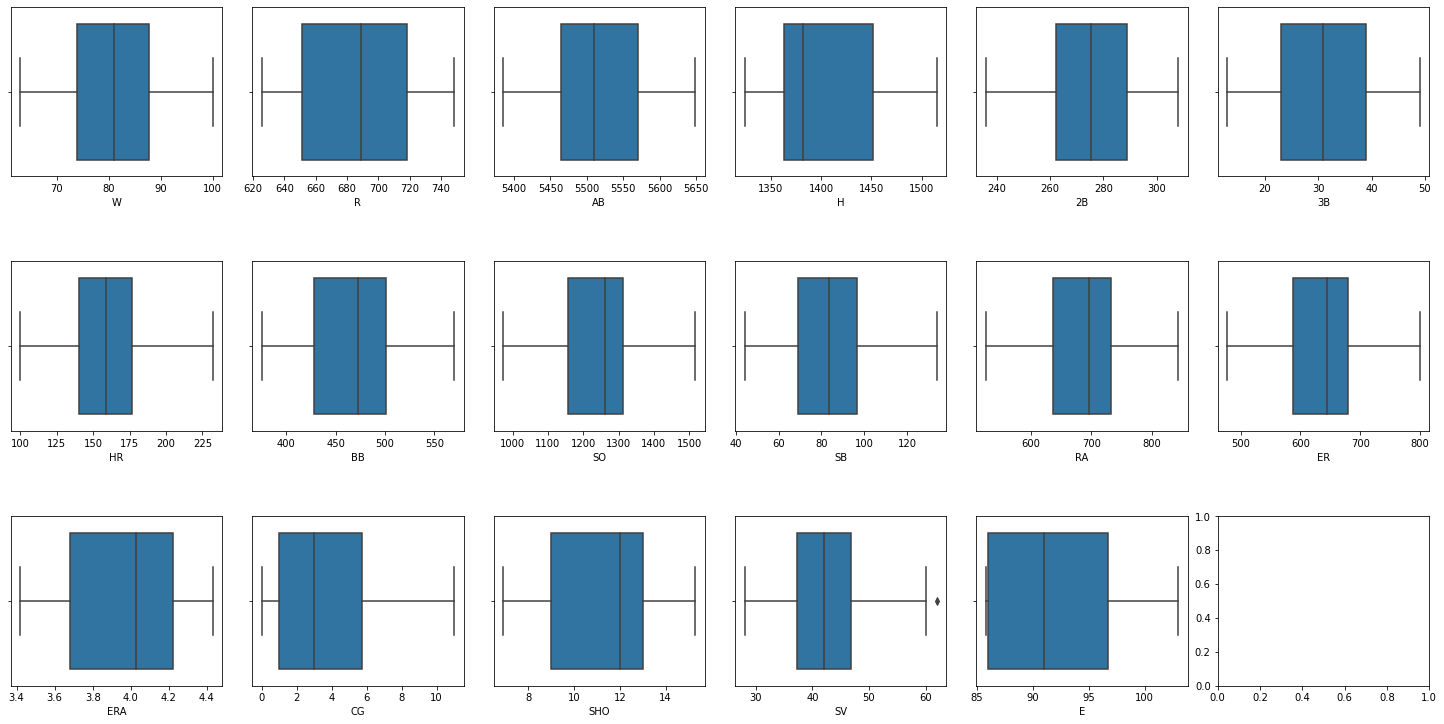

In [23]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.boxplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

#### Now we have removed all the outliers Successfully.

## Checking for the skewness

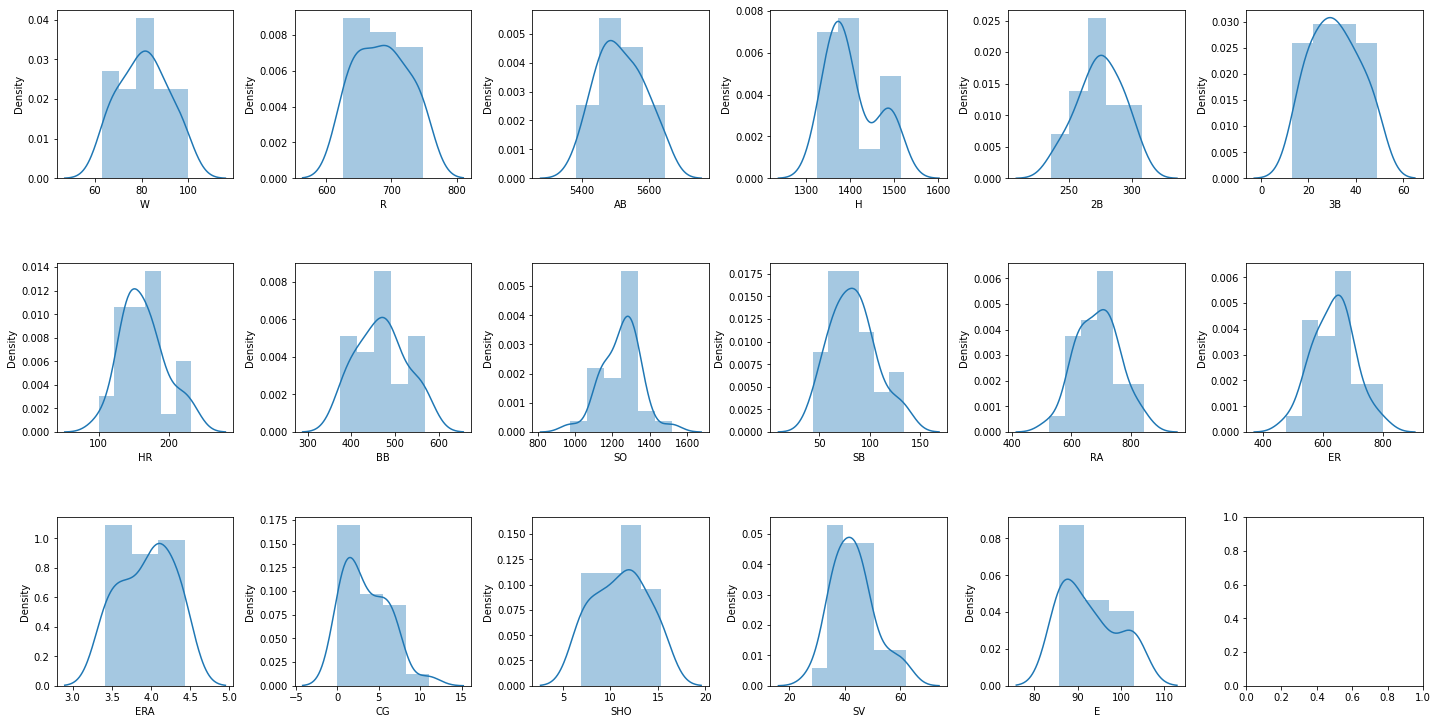

In [24]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.distplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [25]:
df.skew().sort_values(ascending=False)

CG     0.736845
H      0.670254
SV     0.657524
E      0.524973
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
R      0.098953
ER     0.058710
W      0.047089
RA     0.045734
SHO   -0.036436
SO    -0.156065
ERA   -0.191200
2B    -0.230650
dtype: float64

After removing Outliers, we are still able to see the skewness. Let's remove the skewness from the respective columns.

In [26]:
df['CG'] = np.sqrt(df['CG'])
df['CG'].skew()

-0.3114761683268212

In [27]:
df['H'] = np.sqrt(df['H'])
df['H'].skew()

0.6495665705775852

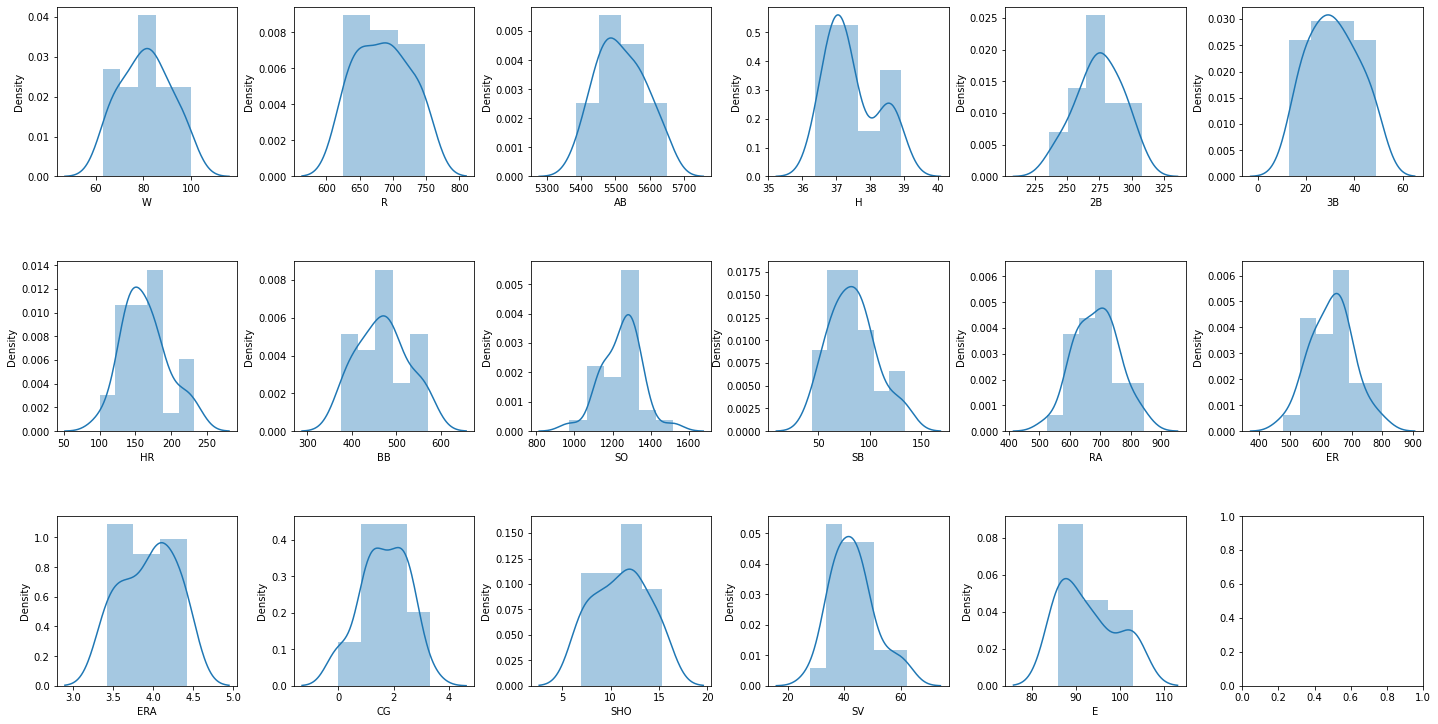

In [28]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.distplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

#### Now we have removed most of the skewness from the dataset. 

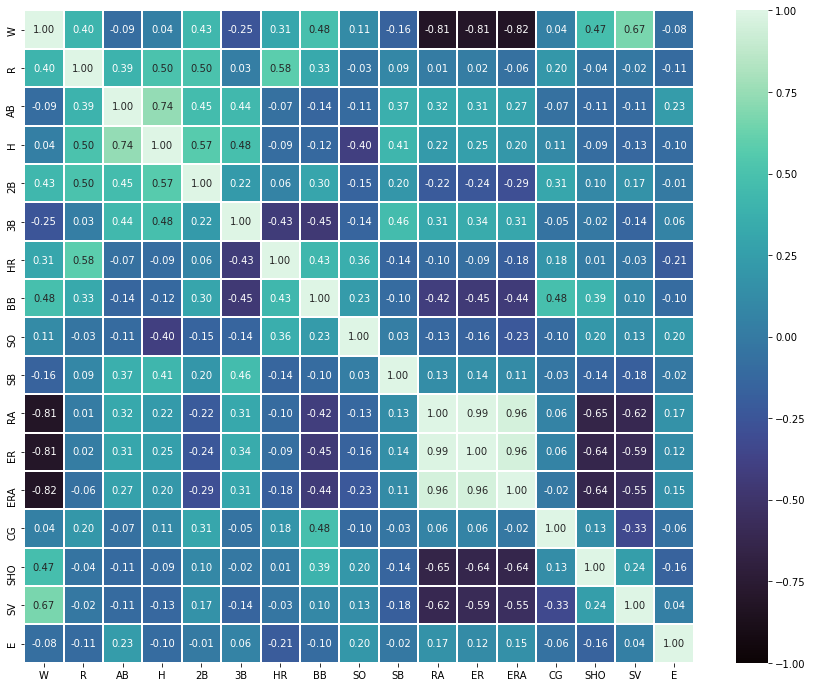

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='white',fmt='0.2f',vmin=-1,cmap='mako')
plt.show()

##### with the above chart, we can clearly notice that
* number of saves is highly correlated with target variable.
* The number of walks i.e. BB is the second highly correlated variable.
* The third one is Shoutouts
* The fouth one is Doubles
* The fifth one is Runs

In [30]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724.0,5575,38.691084,300,42,139,383,973,104,641,601,3.73,1.414214,8.0,56,88.0
1,83,696.0,5467,36.728735,277,44,156,439,1264,70,700,653,4.07,1.414214,12.0,45,86.0
2,81,669.0,5439,37.349699,303,29,141,533,1157,86,640,584,3.67,3.316625,10.0,38,85.8
3,76,625.6,5533,37.161808,260,27,136,404,1231,68,701,643,3.98,2.645751,9.0,37,101.0
4,74,689.0,5605,38.923001,289,49,151,455,1259,83,803,746,4.43,2.645751,12.0,35,86.0


## Splitting the dataset

In [31]:
x = df.drop('W',axis=1)
y=df['W']

In [32]:
x.shape

(30, 16)

In [33]:
y.shape

(30,)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
for i in x.columns:
        x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score

In [36]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    prelr = lr.predict(x_test)
    acc = r2_score(y_test,prelr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accurracy score is ',maxAccu,'and the best random state is',maxRS)

the best accurracy score is  0.8116696052856239 and the best random state is 48


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=48)

### LinearRegression

In [38]:
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))

0.8116696052856239


In [39]:
SCR=cross_val_score(lr,x,y,cv=5,scoring='adjusted_rand_score')
print('cross validation score for LogisticRegression is:',SCR.mean()*100)

cross validation score for LogisticRegression is: 100.0


In [40]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

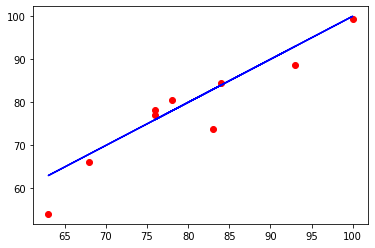

In [41]:
plt.scatter(x=y_test,y=pred_lr, color='r')
plt.plot(y_test,y_test,color='b')

### DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predt = DT.predict(x_test)
print(r2_score(y_test,predt))

0.28967175412920765


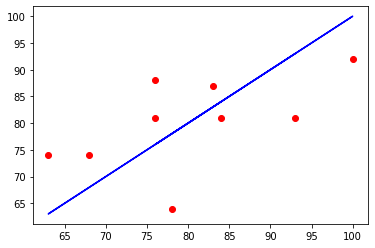

In [43]:
plt.scatter(x=y_test,y=predt, color='r')
plt.plot(y_test,y_test,color='b')

### XGBRegressor

In [44]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)
predxgb = model.predict(x_test)
print(r2_score(y_test,predxgb))

0.3836134605701882


In [45]:
SCR=cross_val_score(model,x,y,cv=5)
print('cross validation score for LogisticRegression is:',SCR.mean()*100)

cross validation score for LogisticRegression is: -81.13232378204198


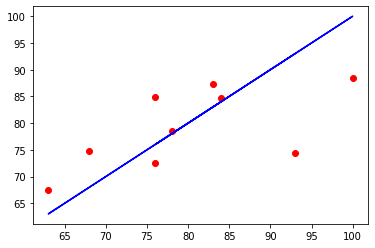

In [46]:
plt.scatter(x=y_test,y=predxgb, color='r')
plt.plot(y_test,y_test,color='b')

## With the above analysis we have found that the LinearRegression is the best model with the accuracy of 81% and 100% Cross Validation Score

### Savind the Model

In [47]:
import pickle
filename = 'BaseBallPrediction.pkl'
pickle.dump(lr,open(filename,'wb'))